In [68]:
import os
import cirq
import qiskit
import pytket
import pytket.qasm
import pytket.passes
import numpy as np
from qiskit.quantum_info import Operator
from natsort import natsorted

import pandas as pd

# from pytket.utils import Graph

# import sys
# sys.path.append('..')
# from phoenix import Circuit


# input_dpath = './output_uccsd/phoenix/all2all'

import matplotlib.pyplot as plt

In [83]:
fnames = natsorted(os.listdir('./qiskit_opt'))


num_2q_gates_original = []
depth_2q_original = []
for fname in fnames:
    fname = os.path.join('./output_uccsd/phoenix/all2all', fname)
    circ = qiskit.QuantumCircuit.from_qasm_file(fname)
    num_2q_gates_original.append(circ.num_nonlocal_gates())
    depth_2q_original.append(circ.depth(lambda instr: instr.operation.num_qubits > 1))



fnames_qiskit = [os.path.join('./qiskit_opt', fname) for fname in fnames]
fnames_tket = [fname.replace('qiskit_opt', 'tket_opt') for fname in fnames_qiskit]

In [84]:
num_2q_gates_qiskit = []
num_2q_gates_tket = []
depth_2q_qiskit = []
depth_2q_tket = []

for fname in fnames:
    fname_qiskit = os.path.join('./qiskit_opt', fname)
    fname_tket = fname_qiskit.replace('qiskit_opt', 'tket_opt')

    circ_qiskit = qiskit.QuantumCircuit.from_qasm_file(fname_qiskit)
    circ_tket = qiskit.QuantumCircuit.from_qasm_file(fname_tket)

    print(f'fname: {fname}')
    print('#gates\t {}\t {}'.format(circ_qiskit.size(), circ_tket.size()))
    print('depth\t {}\t {}'.format(circ_qiskit.depth(), circ_tket.depth()))
    print('#2Q\t {}\t {}'.format(circ_qiskit.num_nonlocal_gates(), circ_tket.num_nonlocal_gates()))
    print('dep(2q)\t {}\t {}'.format(
        circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1),
        circ_tket.depth(lambda intr: intr.operation.num_qubits > 1)
    ))
    num_2q_gates_qiskit.append(circ_qiskit.num_nonlocal_gates())
    num_2q_gates_tket.append(circ_tket.num_nonlocal_gates())
    depth_2q_qiskit.append(circ_qiskit.depth(lambda intr: intr.operation.num_qubits > 1))
    depth_2q_tket.append(circ_tket.depth(lambda intr: intr.operation.num_qubits > 1))

fname: CH2_cmplt_BK_sto3g.qasm
#gates	 6350	 8350
depth	 4292	 5496
#2Q	 3058	 3996
dep(2q)	 2615	 3394
fname: CH2_cmplt_JW_sto3g.qasm
#gates	 9088	 8837
depth	 5878	 5417
#2Q	 4304	 4099
dep(2q)	 3599	 3443
fname: CH2_cmplt_P_sto3g.qasm
#gates	 8105	 9780
depth	 5192	 6247
#2Q	 4104	 4895
dep(2q)	 3449	 4059
fname: CH2_frz_BK_sto3g.qasm
#gates	 3408	 4518
depth	 2332	 3008
#2Q	 1652	 2166
dep(2q)	 1430	 1859
fname: CH2_frz_JW_sto3g.qasm
#gates	 4880	 4741
depth	 3163	 2918
#2Q	 2227	 2111
dep(2q)	 1881	 1792
fname: CH2_frz_P_sto3g.qasm
#gates	 4194	 5181
depth	 2716	 3292
#2Q	 2056	 2519
dep(2q)	 1732	 2062
fname: H2O_cmplt_BK_sto3g.qasm
#gates	 4236	 5813
depth	 2956	 3861
#2Q	 2067	 2793
dep(2q)	 1819	 2385
fname: H2O_cmplt_JW_sto3g.qasm
#gates	 6100	 5922
depth	 3998	 3681
#2Q	 2889	 2749
dep(2q)	 2434	 2330
fname: H2O_cmplt_P_sto3g.qasm
#gates	 5600	 7347
depth	 3634	 4724
#2Q	 2885	 3746
dep(2q)	 2434	 3123
fname: H2O_frz_BK_sto3g.qasm
#gates	 2605	 2837
depth	 1715	 1833
#2Q	 11

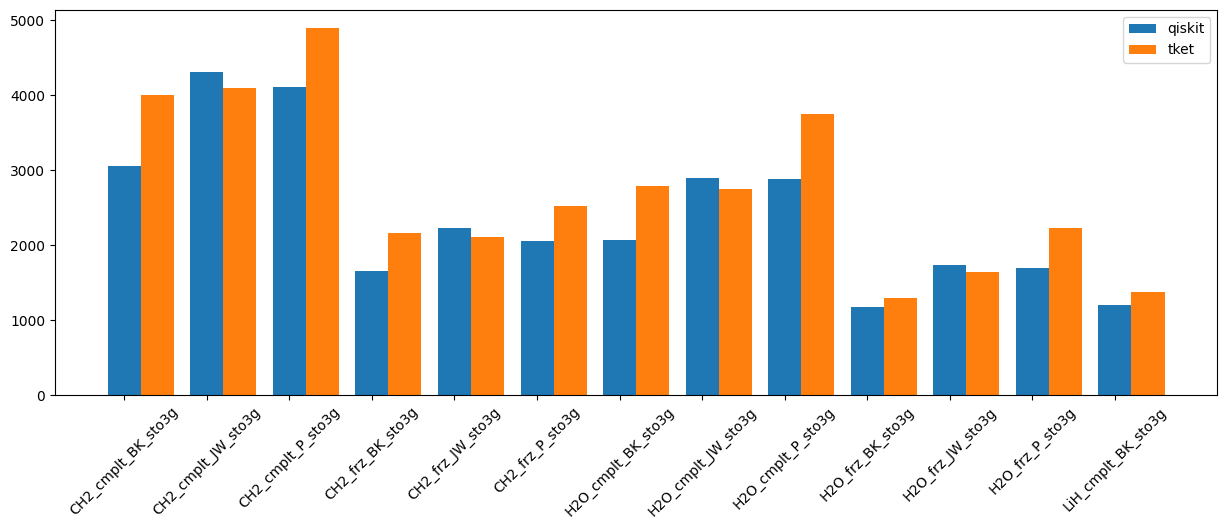

In [89]:
plt.figure(figsize=(15, 5))
width = 0.4
plt.bar(np.arange(len(fnames)), num_2q_gates_qiskit, width, label='qiskit')
plt.bar(np.arange(len(fnames)) + width, num_2q_gates_tket, width, label='tket')
plt.xticks(np.arange(len(fnames)), [fname.split('.')[0] for fname in fnames], rotation=45)

plt.legend()

In [90]:
def geometric_mean(arr):
    return np.prod(arr) ** (1 / len(arr))

In [93]:
geometric_mean(np.array(num_2q_gates_qiskit) / np.array(num_2q_gates_original)), geometric_mean(np.array(num_2q_gates_tket) / np.array(num_2q_gates_original))

(0.6872088424495235, 0.7875285353618277)

In [94]:
geometric_mean(np.array(depth_2q_qiskit) / np.array(depth_2q_original)), geometric_mean(np.array(depth_2q_tket) / np.array(depth_2q_original))


(0.6724182037235912, 0.7649186819137399)

In [ ]:
# plot a bar plot with the same x but two different y data
plt.bar(np.arange(len(fnames)), num_2q_gates_qiskit, width, label='qiskit')
plt.bar(np.arange(len(fnames)) + width, num_2q_gates_tket, width, label='tket')
